In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import tensorflow as tf
import vgg16
import utils

In [3]:
from skimage import io
import matplotlib.pyplot as plt

#### Image Load 및 data 준비하기

In [4]:
fn1 ="./test_data/dacs.jpg"
#fn1 ="./test_data/puzzle.jpeg"
#fn1 ="./test_data/6201041_sd.jpg"
fn2 ="./test_data/banana.jpg"
#fn2 = "./test_data/IMG_0358s.jpg"

In [5]:
i1 = io.imread(fn1)
i2 = io.imread(fn2)

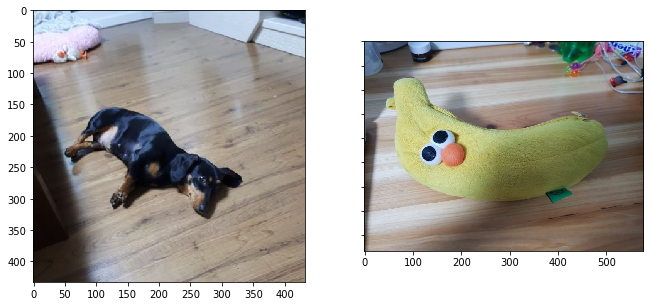

In [6]:
f, axarr = plt.subplots(1,2, sharey=True, figsize=(11,5))
axarr[0].imshow(i1)
axarr[1].imshow(i2)

In [7]:
img1 = utils.load_image(fn1)
img2 = utils.load_image(fn2)

# Just in case of using four-channel images
img1 = img1[:, :, :3]
img2 = img2[:, :, :3]

print(img1.shape)
print(img2.shape)

(224, 224, 3)
(224, 224, 3)


In [8]:
img1r = img1.reshape((1, 224, 224, 3))
img2r = img2.reshape((1, 224, 224, 3))

print(img1r.shape)
print(img2r.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)


In [9]:
batch = np.concatenate((img1r, img2r), 0)
print(batch.shape)

(2, 224, 224, 3)


#### VGG model 

In [10]:
# !wget https://www.dropbox.com/s/8a8rei66f72um4i/vgg16.npy
vgg = vgg16.Vgg16('vgg16.npy')
#print(vgg.data_dict)

npy file loaded


#### Tensorflow

In [11]:
images = tf.placeholder("float", [2, 224, 224, 3])

In [12]:
vgg.build(images)

build model started
build model finished: 5s


* Students : vgg16.py 를 열어서 build 함수 이해하기

In [13]:
# initialize
sess = tf.InteractiveSession()

In [14]:
feed_dict = {images: batch}
prob = sess.run(vgg.prob, feed_dict=feed_dict)

#### 예측 결과 출력하기

In [15]:
print(prob[0])

[5.13720863e-07 5.32790125e-07 2.83874385e-07 7.03427247e-07
 7.29035173e-06 4.59887275e-07 3.97931331e-07 1.04576875e-05
 1.35680539e-05 4.92312552e-07 1.86677680e-05 4.40654094e-06
 1.03602751e-07 4.42701594e-06 1.38692676e-05 3.71646493e-05
 4.35448464e-06 7.27732433e-04 8.78440158e-04 3.51301787e-05
 6.89976696e-06 4.55805002e-06 6.62328603e-07 4.77761068e-06
 9.91731213e-07 3.01095104e-04 3.18325947e-05 6.29728129e-06
 8.69807554e-04 1.20961420e-06 4.09376617e-06 3.02452900e-05
 1.52843895e-05 1.15447176e-06 3.85786880e-05 1.89641742e-06
 1.05881963e-05 6.54015412e-06 4.11555266e-05 5.12889699e-07
 2.61612536e-06 3.18040861e-06 2.28863996e-06 5.18386400e-07
 2.39248152e-06 2.64285700e-06 6.13699649e-06 6.30951149e-07
 2.15732584e-07 3.04261744e-06 6.43191561e-06 7.29720000e-07
 3.42445810e-06 1.08204084e-04 1.64132907e-05 2.93248763e-06
 8.34884646e-04 4.98088457e-06 1.51586919e-05 1.41173859e-05
 5.24354473e-05 3.25932961e-05 3.04922014e-06 4.86878434e-06
 5.12606812e-06 1.685858

In [16]:
print(prob[0].shape)

(1000,)


In [17]:
print(np.argmax(prob[0]))

164


In [18]:
# returns the top1 string
def print_prob(prob, file_path):
    synset = [l.strip() for l in open(file_path).readlines()]

    # print prob
    pred = np.argsort(prob)[::-1]

    # Get top1 label
    top1 = synset[pred[0]]
    print(("Top1: ", top1, prob[pred[0]]))
    # Get top5 label
    top5 = [(synset[pred[i]], prob[pred[i]]) for i in range(5)]
    print(("Top5: ", top5))
    return top1

#!cat synset.txt # Linux or Mac users
!type synset.txt # Windows users

In [19]:
top1 = print_prob(prob[0], 'synset.txt')

('Top1: ', 'n02088632 bluetick', 0.26922202)
('Top5: ', [('n02088632 bluetick', 0.26922202), ('n02107908 Appenzeller', 0.1710041), ('n02107312 miniature pinscher', 0.16028678), ('n02087046 toy terrier', 0.07782255), ('n02108000 EntleBucher', 0.0697676)])


In [20]:
print("Top1: {}".format(top1))

Top1: n02088632 bluetick


In [21]:
print_prob(prob[1], 'synset.txt')

('Top1: ', 'n03047690 clog, geta, patten, sabot', 0.46212894)
('Top5: ', [('n03047690 clog, geta, patten, sabot', 0.46212894), ('n04254777 sock', 0.21030204), ('n03935335 piggy bank, penny bank', 0.05384669), ('n03125729 cradle', 0.03298259), ('n03840681 ocarina, sweet potato', 0.02606089)])


'n03047690 clog, geta, patten, sabot'